# Решение Рудницкого С.Ф.
## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler  
#from sklearn import tree
import numpy as np
from sklearn.metrics import f1_score

from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

%matplotlib inline

In [2]:
df = pd.read_csv("./content/train_dataset_train.csv")

## Рассмотрим датасет по ближе

In [3]:
df.head(3)

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
0,72716,16019,2015,Жен,ОО,Английский язык,1998-02-08 00:00:00.000,"МБОУ ""СОШ №59""","Алтайский край, Барнаул г",2014.0,...,0.0,0,0.0,Россия,0.0,0.0,0.0,41.0,4.294,3
1,63306,14895,2010,Муж,ЦН,NaN,1992-04-18 00:00:00.000,NaN,NaN,NaN,...,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,67.000,4
2,82469,20103,2017,Жен,ДН,Английский язык,1999-03-21 00:00:00.000,МБОУ Алтайская СОШ №5,"Алтайский край, Алтайский р-н, Алтайское с",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,41.0,4.133,4


In [4]:
df.shape

(13584, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13584 non-null  int64  
 1   Код_группы        13584 non-null  int64  
 2   Год_Поступления   13584 non-null  int64  
 3   Пол               13577 non-null  object 
 4   Основания         13584 non-null  object 
 5   Изучаемый_Язык    12758 non-null  object 
 6   Дата_Рождения     13584 non-null  object 
 7   Уч_Заведение      12351 non-null  object 
 8   Где_Находится_УЗ  12203 non-null  object 
 9   Год_Окончания_УЗ  12284 non-null  float64
 10  Пособие           12576 non-null  float64
 11  Страна_ПП         13237 non-null  object 
 12  Регион_ПП         12966 non-null  object 
 13  Город_ПП          13141 non-null  object 
 14  Общежитие         13498 non-null  float64
 15  Наличие_Матери    13584 non-null  int64  
 16  Наличие_Отца      13584 non-null  float6

Заменим все пропуски в данных

In [ ]:
#df = df.fillna(0)

Построим на распределение данных

 ```
 1   Код_группы        13584 non-null  int64  
 2   Год_Поступления   13584 non-null  int64  
 3   Пол               13577 non-null  object 
 4   Основания         13584 non-null  object 
 5   Изучаемый_Язык    12758 non-null  object 
 6   Дата_Рождения     13584 non-null  object 
 7   Уч_Заведение      12351 non-null  object 
 8   Где_Находится_УЗ  12203 non-null  object 
 9   Год_Окончания_УЗ  12284 non-null  float64
 10  Пособие           12576 non-null  float64
 11  Страна_ПП         13237 non-null  object 
 12  Регион_ПП         12966 non-null  object 
 13  Город_ПП          13141 non-null  object 
 14  Общежитие         13498 non-null  float64
 15  Наличие_Матери    13584 non-null  int64  
 16  Наличие_Отца      13584 non-null  float64
 17  Страна_Родители   13126 non-null  object 
 18  Опекунство        13584 non-null  float64
 19  Село              13498 non-null  float64
 20  Иностранец        13274 non-null  float64
 21  КодФакультета     13584 non-null  float64
 22  СрБаллАттестата   13584 non-null  float64
 23  Статус            13584 non-null  int64  
 ```

In [ ]:
df["Пол"].value_counts()

In [ ]:
sns.countplot(x = "Статус" , data  = df).set_title('Распределение предсказываемой величины')

In [ ]:
df["Год_Поступления"].value_counts() # Будем работать с этим полем

In [ ]:
df["Основания"].value_counts()

In [ ]:
#df["Изучаемый_Язык"].value_counts()
df_row_concat["Изучаемый_Язык"].value_counts()

In [ ]:
df["Дата_Рождения"].value_counts() #Убрать это поле

In [ ]:
df['Год рождения'] = df['Дата_Рождения'].apply(lambda x : x[:4])

In [ ]:
df["Год рождения"].value_counts()

In [ ]:
df["Уч_Заведение"].value_counts() # Не будем принимать в расчет

In [ ]:
df["Где_Находится_УЗ"].value_counts() # Не будем принимать в расчет

In [ ]:
df["Год_Окончания_УЗ"].value_counts() # Не будем принимать в расчет

In [ ]:
df["Пособие"].value_counts() # Не будем принимать в расчет

In [ ]:
df_row_concat["Страна_ПП"].value_counts() # Не будем брать в расчет

In [ ]:
df["Регион_ПП"].value_counts() # Не будем брать в расчет

In [ ]:
df["Город_ПП"].value_counts() # Не будем брать в расчет

In [ ]:
df_row_concat["Общежитие"].value_counts() # Будем работать

In [ ]:
df_row_concat["Наличие_Матери"].value_counts() # Будем работать

In [ ]:
df_row_concat["Наличие_Отца"].value_counts() # Будем работать

In [ ]:
df_row_concat["Страна_Родители"].value_counts() # Не будем принимать в расчет

In [ ]:
df["Опекунство"].value_counts() # Не будем принимать в расчет

In [ ]:
df["Основания"].value_counts() 

In [ ]:
df_row_concat["Село"].value_counts() # Будем работать

In [ ]:
df_row_concat["Иностранец"].value_counts() # Будем работать

In [ ]:
df["КодФакультета"].value_counts() # Будем работать

In [ ]:
df["СрБаллАттестата"].value_counts() # Будем работать

In [ ]:
df["Код_группы"].value_counts() # Будем работать

In [6]:
def change_country(x):
    if x == 'Россия':
        return 'Россия'
    elif x == 'Казахстан':
        return 'Казахстан'
    elif x == 'Китай':
        return 'Китай'
    elif x == 'Таджикистан':
        return 'Таджикистан'
    elif x == 'Кыргызстан':
        return 'Кыргызстан'
    elif x == 'Киргизия':
        return 'Киргизия'
    elif x == 'Кыргызия':
        return 'Кыргызия'
    elif x == 'Казахстан респ':
        return 'Казахстан'
    elif x == 'Кыргызская Республика':
        return 'Кыргызия'
    elif x == 'Казахстан Респ':
        return 'Казахстан'
    elif x == 'Республика Казахстан':
        return 'Казахстан'
    elif x == 'Казахстан ВКО':
        return 'Казахстан'
    elif x == 'Росссия':
        return 'Россия'
    elif x == 'Республика Таджикистан':
        return 'Таджикистан'
    elif x == 'КИТАЙ':
        return 'Китай'
    elif x == 'КАЗАХСТАН':
        return 'Казахстан'
    else:
        return 'Страна_ПП_прочая'

def change_birthyear(x):
    if x == '1995':
        return '1995'
    elif x == '1996':
        return '1996'
    elif x == '1994':
        return '1994'
    elif x == '1997':
        return '1997'
    elif x == '1998':
        return '1998'
    elif x == '1993':
        return '1993'
    elif x == '1999':
        return '1999'
    elif x == '1992':
        return '1992'
    elif x == '2000':
        return '2000'
    elif x == '1991':
        return '1991'
    elif x == '1990':
        return '1990'
    elif x == '2001':
        return '2001'
    elif x == '1989':
        return '1989'
    elif x == '1988':
        return '1988'
    elif x == '1987':
        return '1987'
    elif x == '1983':
        return '1983'
    elif x == '1984':
        return '1984'
    elif x == '1986':
        return '1986'
    elif x == '1985':
        return '1985'
    else:
        return '0000'

def change_lang(x):
    if x == 'Английский язык':
        return 'Английский язык'
    elif x == 'Немецкий язык':
        return 'Немецкий язык'
    elif x == 'Французский язык':
        return 'Другой язык'
    elif x == 'Иностранный язык (Английский)':
        return 'Английский язык'
    elif x == 'Англиийский':
        return 'Английский язык'
    elif x == 'Иностранный язык (Немецкий)':
        return 'Немецкий язык'
    else:
        return 'Другой язык'

def change_yearstart(x):
    if x == 2015:
        return 2015
    elif x == 2014:
        return 2014
    elif x == 2016:
        return 2016
    elif x == 2013:
        return 2013
    elif x == 2017:
        return 2017
    elif x == 2012:
        return 2012
    elif x == 2018:
        return 2018
    else:
        return 0

def change_balls(x):
    if x < 1:
        return '0'
    elif 1 <= x < 1.5:
        return '1'
    elif 1.5 <= x < 2:
        return '1.5'
    elif 2 <= x < 2.5:
        return '2'
    elif 2.5 <= x < 3:
        return '2.5'
    elif 3 <= x < 3.5:
        return '3'
    elif 3.5 <= x < 4:
        return '3.5'
    elif 4 <= x < 4.5:
        return '4'
    elif 4.5 <= x < 5:
        return '4.5'
    elif x == 5:
        return '5'
    elif 10 <= x < 20:
        return '10'
    elif 20 <= x < 30:
        return '20'
    elif 30 <= x < 40:
        return '30'
    elif 40 <= x < 50:
        return '40'
    elif 50 <= x < 60:
        return '50'
    elif 60 <= x < 70:
        return '60'
    elif 70 <= x < 80:
        return '70'
    elif 80 <= x < 90:
        return '80'
    elif 90 <= x < 100:
        return '90'
    elif x == 100:
        return '100'
    else:
        return '0'
    
class2idx = {
    -1:0,
    3:1,
    4:2,
    0:3
}

idx2class = {v: k for k, v in class2idx.items()}

def change_sex(x):
    if x == 'муж':
        return 'Муж'
    elif x == 'жен':
        return 'Жен'
    else: 
        return x

def prepare_dataset(x):
    
    x = x.drop(['Код_группы'], axis='columns')
    
    x['Пол'] = x['Пол'].apply(change_sex)
    x = pd.get_dummies(x,columns = ['Пол'], drop_first = False, dummy_na = True)
    
    x = pd.get_dummies(x,columns = ['Основания'], drop_first = False, dummy_na = True)
    
    x['Изучаемый_Язык'] = x['Изучаемый_Язык'].apply(change_lang)
    x = pd.get_dummies(x,columns = ['Изучаемый_Язык'], drop_first = False, dummy_na = True)
    
    x['Год_Поступления'] = x['Год_Поступления'].apply(change_yearstart)
    x = pd.get_dummies(x,columns = ['Год_Поступления'], drop_first = False, dummy_na = True)
    
    x['Год рождения'] = x['Дата_Рождения'].apply(lambda x : x[:4])
    x['Год рождения'] = x['Год рождения'].apply(change_birthyear)
    x = pd.get_dummies(x,columns = ['Год рождения'], drop_first = False, dummy_na = True)
    x = x.drop(['Дата_Рождения'], axis='columns')
    
    x = x.drop(['Уч_Заведение'], axis='columns')
    x = x.drop(['Где_Находится_УЗ'], axis='columns')
    
    #x = pd.get_dummies(x,columns = ['Год_Окончания_УЗ'], drop_first = False, dummy_na = True)
    x = x.drop(['Год_Окончания_УЗ'], axis='columns')

    x = x.drop(['Пособие'], axis='columns')
    
    #x = x.drop(['Страна_ПП'], axis='columns')
    x['Страна_ПП'] = x['Страна_ПП'].apply(change_country)
    x = pd.get_dummies(x,columns = ['Страна_ПП'], drop_first = False, dummy_na = True)
    
    x = x.drop(['Регион_ПП'], axis='columns')
    x = x.drop(['Город_ПП'], axis='columns')
    
    x = pd.get_dummies(x,columns = ['Общежитие'], drop_first = False, dummy_na = True)
    x = pd.get_dummies(x,columns = ['Наличие_Матери'], drop_first = False, dummy_na = True)
    x = pd.get_dummies(x,columns = ['Наличие_Отца'], drop_first = False, dummy_na = True)
    
    x = x.drop(['Страна_Родители'], axis='columns')
    
    x = x.drop(['Опекунство'], axis='columns')

    x = pd.get_dummies(x,columns = ['Село'], drop_first = False, dummy_na = True)
    x = pd.get_dummies(x,columns = ['Иностранец'], drop_first = False, dummy_na = True)
    
    x = pd.get_dummies(x,columns = ['КодФакультета'], drop_first = False, dummy_na = True)
    #x = x.drop(['КодФакультета'], axis='columns') # RSF
    
    df["СрБаллАттестатаАдапт"] = x['СрБаллАттестата'].apply(change_balls)
    x = x.drop(['СрБаллАттестата'], axis='columns')
    
    x['Статус'].replace(class2idx, inplace=True)
    
    return x

In [7]:
dftr = pd.read_csv("./content/train_dataset_train.csv")
len_train = len(dftr)
print(len_train)
dfte = pd.read_csv("./content/test_dataset_test.csv")
dfte['Статус'] = 0
df_row_concat = pd.concat([dftr, dfte], ignore_index=True, axis=0) 
len(df_row_concat)

13584


20275

In [8]:
df_row_concat.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20275 entries, 0 to 20274
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                20275 non-null  int64  
 1   Код_группы        20275 non-null  int64  
 2   Год_Поступления   20275 non-null  int64  
 3   Пол               20265 non-null  object 
 4   Основания         20275 non-null  object 
 5   Изучаемый_Язык    19053 non-null  object 
 6   Дата_Рождения     20275 non-null  object 
 7   Уч_Заведение      18464 non-null  object 
 8   Где_Находится_УЗ  18234 non-null  object 
 9   Год_Окончания_УЗ  18358 non-null  float64
 10  Пособие           18783 non-null  float64
 11  Страна_ПП         19768 non-null  object 
 12  Регион_ПП         19367 non-null  object 
 13  Город_ПП          19618 non-null  object 
 14  Общежитие         20154 non-null  float64
 15  Наличие_Матери    20275 non-null  int64  
 16  Наличие_Отца      20275 non-null  float6

In [9]:
df = prepare_dataset(df_row_concat)

In [10]:
df.head()

,ID,Статус,Пол_Жен,Пол_Муж,Пол_nan,Основания_БН,Основания_ДН,Основания_ЛН,Основания_ОО,Основания_СН,...,КодФакультета_40.0,КодФакультета_41.0,КодФакультета_45.0,КодФакультета_46.0,КодФакультета_47.0,КодФакультета_48.0,КодФакультета_49.0,КодФакультета_51.0,КодФакультета_53.0,КодФакультета_nan
0,72716,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,63306,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82469,2,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,81661,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,81509,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20275 entries, 0 to 20274
Data columns (total 91 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   ID                              20275 non-null  int64
 1   Статус                          20275 non-null  int64
 2   Пол_Жен                         20275 non-null  uint8
 3   Пол_Муж                         20275 non-null  uint8
 4   Пол_nan                         20275 non-null  uint8
 5   Основания_БН                    20275 non-null  uint8
 6   Основания_ДН                    20275 non-null  uint8
 7   Основания_ЛН                    20275 non-null  uint8
 8   Основания_ОО                    20275 non-null  uint8
 9   Основания_СН                    20275 non-null  uint8
 10  Основания_ЦН                    20275 non-null  uint8
 11  Основания_nan                   20275 non-null  uint8
 12  Изучаемый_Язык_Английский язык  20275 non-null  uint8
 13  И

In [12]:
df = df.set_index('ID')
df

,Статус,Пол_Жен,Пол_Муж,Пол_nan,Основания_БН,Основания_ДН,Основания_ЛН,Основания_ОО,Основания_СН,Основания_ЦН,...,КодФакультета_40.0,КодФакультета_41.0,КодФакультета_45.0,КодФакультета_46.0,КодФакультета_47.0,КодФакультета_48.0,КодФакультета_49.0,КодФакультета_51.0,КодФакультета_53.0,КодФакультета_nan
ID,,,,,,,,,,,,,,,,,,,,,
72716,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
63306,2,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82469,2,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
81661,2,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81509,2,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74342,3,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54876,3,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
66879,3,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Снова разделим датасеты на обучающий и тестовый
dataset_train = df.iloc[:len_train, :]
dataset_test = df.iloc[len_train:, :]

In [14]:
need_columns = ['Статус', 'Основания_БН', 'Основания_СН', 'Основания_ОО', 'Год_Поступления_0.0', 'Основания_ДН', 
                'Год_Поступления_2017.0', 'Год_Поступления_2013.0', 'Год рождения_1994', 'КодФакультета_41.0', 
                'Год_Поступления_2012.0', 'Изучаемый_Язык_Английский язык', 'Год рождения_1995', 'КодФакультета_26.0',
                'Село_1.0', 'Село_0.0', 'Год рождения_1996', 'Изучаемый_Язык_Немецкий язык', 'Год рождения_1997',
                'КодФакультета_25.0', 'Год_Поступления_2018.0', 'КодФакультета_51.0', 'Пол_Муж', 'Год_Поступления_2014.0',
                'Общежитие_0.0', 'Общежитие_1.0', 'Пол_Жен', 'Год_Поступления_2015.0', 'КодФакультета_34.0',
                'Год рождения_1993', 'КодФакультета_27.0', 'Год рождения_0000', 
                'Год рождения_1992', 'Год_Поступления_2016.0',
                'Год рождения_1998', 'Год рождения_1999', 'КодФакультета_24.0', 'Иностранец_0.0', 'КодФакультета_31.0',
                'Год рождения_1991', 'КодФакультета_40.0', 'Год рождения_1990', 'КодФакультета_28.0', 'КодФакультета_30.0',
                'Изучаемый_Язык_Другой язык', 'Страна_ПП_Россия', 'Год рождения_2000']

dataset_train = dataset_train[need_columns]
dataset_test = dataset_test[need_columns]

In [15]:
'''
feature 3	0.035520	Основания_БН
feature 7	0.031676	Основания_СН
feature 6	0.029944	Основания_ОО
feature 14	0.029870	Год_Поступления_0.0
feature 4	0.028144	Основания_ДН
feature 20	0.026481	Год_Поступления_2017.0
feature 16	0.025108	Год_Поступления_2013.0
feature 35	0.023506	Год рождения_1994
feature 80	0.022759	КодФакультета_41.0
feature 15	0.022260	Год_Поступления_2012.0
feature 10	0.022156	Изучаемый_Язык_Английский язык
feature 36	0.021946	Год рождения_1995
feature 70	0.021577	КодФакультета_26.0
feature 63	0.020821	Село_1.0
feature 62	0.020492	Село_0.0
feature 37	0.020345	Год рождения_1996
feature 12	0.019973	Изучаемый_Язык_Немецкий язык
feature 38	0.019650	Год рождения_1997
feature 69	0.019527	КодФакультета_25.0
feature 21	0.019289	Год_Поступления_2018.0
feature 86	0.018185	КодФакультета_51.0
feature 1	0.017889	Пол_Муж
feature 17	0.017623	Год_Поступления_2014.0
feature 53	0.017445	Общежитие_0.0
feature 54	0.017326	Общежитие_1.0
feature 0	0.017293	Пол_Жен
feature 18	0.017256	Год_Поступления_2015.0
feature 75	0.016712	КодФакультета_34.0
feature 34	0.016688	Год рождения_1993
feature 71	0.016060	КодФакультета_27.0
feature 23	0.015234	Год рождения_0000
feature 33	0.015043	Год рождения_1992
feature 19	0.014233	Год_Поступления_2016.0
feature 39	0.013871	Год рождения_1998
feature 40	0.013689	Год рождения_1999
feature 68	0.012378	КодФакультета_24.0
feature 65	0.011649	Иностранец_0.0
feature 74	0.011398	КодФакультета_31.0
feature 32	0.011246	Год рождения_1991
feature 79	0.011241	КодФакультета_40.0
feature 31	0.011239	Год рождения_1990
feature 72	0.010650	КодФакультета_28.0
feature 73	0.010579	КодФакультета_30.0
feature 11	0.010535	Изучаемый_Язык_Другой язык
feature 49	0.010488	Страна_ПП_Россия
feature 41	0.010124	Год рождения_2000
feature 59	0.009867	Наличие_Отца_0.0
feature 76	0.009750	КодФакультета_35.0
feature 60	0.008596	Наличие_Отца_1.0
feature 84	0.008386	КодФакультета_48.0
'''

'\nfeature 3\t0.035520\tОснования_БН\nfeature 7\t0.031676\tОснования_СН\nfeature 6\t0.029944\tОснования_ОО\nfeature 14\t0.029870\tГод_Поступления_0.0\nfeature 4\t0.028144\tОснования_ДН\nfeature 20\t0.026481\tГод_Поступления_2017.0\nfeature 16\t0.025108\tГод_Поступления_2013.0\nfeature 35\t0.023506\tГод рождения_1994\nfeature 80\t0.022759\tКодФакультета_41.0\nfeature 15\t0.022260\tГод_Поступления_2012.0\nfeature 10\t0.022156\tИзучаемый_Язык_Английский язык\nfeature 36\t0.021946\tГод рождения_1995\nfeature 70\t0.021577\tКодФакультета_26.0\nfeature 63\t0.020821\tСело_1.0\nfeature 62\t0.020492\tСело_0.0\nfeature 37\t0.020345\tГод рождения_1996\nfeature 12\t0.019973\tИзучаемый_Язык_Немецкий язык\nfeature 38\t0.019650\tГод рождения_1997\nfeature 69\t0.019527\tКодФакультета_25.0\nfeature 21\t0.019289\tГод_Поступления_2018.0\nfeature 86\t0.018185\tКодФакультета_51.0\nfeature 1\t0.017889\tПол_Муж\nfeature 17\t0.017623\tГод_Поступления_2014.0\nfeature 53\t0.017445\tОбщежитие_0.0\nfeature 54\t0.0

In [16]:
dataset_train

,Статус,Основания_БН,Основания_СН,Основания_ОО,Год_Поступления_0.0,Основания_ДН,Год_Поступления_2017.0,Год_Поступления_2013.0,Год рождения_1994,КодФакультета_41.0,...,Иностранец_0.0,КодФакультета_31.0,Год рождения_1991,КодФакультета_40.0,Год рождения_1990,КодФакультета_28.0,КодФакультета_30.0,Изучаемый_Язык_Другой язык,Страна_ПП_Россия,Год рождения_2000
ID,,,,,,,,,,,,,,,,,,,,,
72716,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
63306,2,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
82469,2,0,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
81661,2,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
81509,2,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74283,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
71516,2,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
76970,2,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [17]:
# Выделим вход и выход
X = dataset_train.iloc[:, 1:]
y = dataset_train.iloc[:, :1]

In [18]:
y.shape

(13584, 1)

In [19]:
y.value_counts()

Статус
2         8249
1         4721
0          614
dtype: int64

In [20]:
# Разобъем обучающий набор на обучение и валидацию
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=21)

In [21]:
# Нормализуем вход

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)

## Создаем нейросеть

In [22]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())

val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())

### Создаем взвешенный датасет

In [23]:
def get_class_distribution(obj):
    count_dict = {
        "status_m1": 0,
        "status_3": 0,
        "status_4": 0,
    }
    
    for i in obj:
        if i == 0: 
            count_dict['status_m1'] += 1
        elif i == 1: 
            count_dict['status_3'] += 1
        elif i == 2: 
            count_dict['status_4'] += 1
        else:
            print("Проверьте классы.")
            
    return count_dict

In [24]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)

In [25]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([0.0018, 0.0002, 0.0001])


In [26]:
class_weights_all = class_weights[target_list]

In [27]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

### Параметры модели

In [28]:
EPOCHS = 700
BATCH_SIZE = 15
LEARNING_RATE = 0.0007
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 3

### Создаем даталоадеры

In [29]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, sampler=weighted_sampler)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)

### Определяем архитектуру сети

In [30]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 256)
        self.layer_3 = nn.Linear(256, 128)
        self.layer_4 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(256)
        self.batchnorm3 = nn.BatchNorm1d(128)
        self.batchnorm4 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_4(x)
        x = self.batchnorm4(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer_out(x)
        
        return x

In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [32]:
weight=class_weights.to(device)
weight

tensor([0.0018, 0.0002, 0.0001])

In [33]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=46, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=256, bias=True)
  (layer_3): Linear(in_features=256, out_features=128, bias=True)
  (layer_4): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


### Обучаем модель

In [34]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [35]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [36]:
print("Начало обучения.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # ОБУЧЕНИЕ
    train_epoch_loss = 0
    train_epoch_acc = 0
    
    model.train()
    
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        #train_loss = criterion(y_train_pred, y_train_batch)
        train_loss = criterion(y_train_pred, torch.flatten(y_train_batch))
        #train_acc = multi_acc(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, torch.flatten(y_train_batch))
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # ВАЛИДАЦИЯ    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, torch.flatten(y_val_batch))
            val_acc = multi_acc(y_val_pred, torch.flatten(y_val_batch))
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
            
        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['val'].append(val_epoch_loss/len(val_loader))
        accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
        accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    print(f'Эпоха {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


Начало обучения.


  0%|          | 0/700 [00:00<?, ?it/s]

Эпоха 001: | Train Loss: 0.48688 | Val Loss: 1.55091 | Train Acc: 46.526| Val Acc: 22.001
Эпоха 002: | Train Loss: 0.40996 | Val Loss: 1.31624 | Train Acc: 53.433| Val Acc: 36.571
Эпоха 003: | Train Loss: 0.38104 | Val Loss: 1.37889 | Train Acc: 57.009| Val Acc: 32.965
Эпоха 004: | Train Loss: 0.35699 | Val Loss: 1.19248 | Train Acc: 60.434| Val Acc: 44.003
Эпоха 005: | Train Loss: 0.34195 | Val Loss: 1.31954 | Train Acc: 61.661| Val Acc: 41.133
Эпоха 006: | Train Loss: 0.32690 | Val Loss: 1.18592 | Train Acc: 63.894| Val Acc: 43.561
Эпоха 007: | Train Loss: 0.31345 | Val Loss: 1.16361 | Train Acc: 65.460| Val Acc: 45.180
Эпоха 008: | Train Loss: 0.29959 | Val Loss: 1.22778 | Train Acc: 65.823| Val Acc: 43.709
Эпоха 009: | Train Loss: 0.29333 | Val Loss: 1.15303 | Train Acc: 66.404| Val Acc: 43.929
Эпоха 010: | Train Loss: 0.29359 | Val Loss: 1.19603 | Train Acc: 68.017| Val Acc: 45.695
Эпоха 011: | Train Loss: 0.29314 | Val Loss: 1.02487 | Train Acc: 67.215| Val Acc: 53.863
Эпоха 012:

Эпоха 093: | Train Loss: 0.17861 | Val Loss: 1.01432 | Train Acc: 78.533| Val Acc: 61.589
Эпоха 094: | Train Loss: 0.18408 | Val Loss: 1.06635 | Train Acc: 77.952| Val Acc: 61.369
Эпоха 095: | Train Loss: 0.17858 | Val Loss: 1.07377 | Train Acc: 78.480| Val Acc: 58.646
Эпоха 096: | Train Loss: 0.17960 | Val Loss: 0.98762 | Train Acc: 78.580| Val Acc: 61.957
Эпоха 097: | Train Loss: 0.16701 | Val Loss: 1.00506 | Train Acc: 78.634| Val Acc: 60.854
Эпоха 098: | Train Loss: 0.17165 | Val Loss: 1.09023 | Train Acc: 79.945| Val Acc: 60.927
Эпоха 099: | Train Loss: 0.18069 | Val Loss: 1.02396 | Train Acc: 78.762| Val Acc: 60.633
Эпоха 100: | Train Loss: 0.18318 | Val Loss: 0.99862 | Train Acc: 77.842| Val Acc: 61.516
Эпоха 101: | Train Loss: 0.18052 | Val Loss: 0.99393 | Train Acc: 78.487| Val Acc: 63.355
Эпоха 102: | Train Loss: 0.16650 | Val Loss: 0.97887 | Train Acc: 79.584| Val Acc: 62.840
Эпоха 103: | Train Loss: 0.17065 | Val Loss: 1.05465 | Train Acc: 78.880| Val Acc: 61.001
Эпоха 104:

Эпоха 185: | Train Loss: 0.15783 | Val Loss: 1.04267 | Train Acc: 80.818| Val Acc: 62.987
Эпоха 186: | Train Loss: 0.14851 | Val Loss: 1.04242 | Train Acc: 81.396| Val Acc: 63.870
Эпоха 187: | Train Loss: 0.15650 | Val Loss: 1.04592 | Train Acc: 80.848| Val Acc: 62.252
Эпоха 188: | Train Loss: 0.15440 | Val Loss: 1.00900 | Train Acc: 81.090| Val Acc: 63.944
Эпоха 189: | Train Loss: 0.16114 | Val Loss: 1.01407 | Train Acc: 80.745| Val Acc: 63.723
Эпоха 190: | Train Loss: 0.14877 | Val Loss: 1.06444 | Train Acc: 81.456| Val Acc: 62.546
Эпоха 191: | Train Loss: 0.15318 | Val Loss: 1.02501 | Train Acc: 81.474| Val Acc: 62.914
Эпоха 192: | Train Loss: 0.16012 | Val Loss: 1.01095 | Train Acc: 80.714| Val Acc: 63.135
Эпоха 193: | Train Loss: 0.15445 | Val Loss: 0.98435 | Train Acc: 80.733| Val Acc: 63.429
Эпоха 194: | Train Loss: 0.15935 | Val Loss: 1.04165 | Train Acc: 80.887| Val Acc: 61.442
Эпоха 195: | Train Loss: 0.14981 | Val Loss: 1.07717 | Train Acc: 81.529| Val Acc: 62.104
Эпоха 196:

Эпоха 277: | Train Loss: 0.14385 | Val Loss: 1.07402 | Train Acc: 82.627| Val Acc: 64.901
Эпоха 278: | Train Loss: 0.14177 | Val Loss: 1.06613 | Train Acc: 83.141| Val Acc: 66.152
Эпоха 279: | Train Loss: 0.14645 | Val Loss: 1.09491 | Train Acc: 82.553| Val Acc: 62.693
Эпоха 280: | Train Loss: 0.14701 | Val Loss: 0.95757 | Train Acc: 82.423| Val Acc: 66.519
Эпоха 281: | Train Loss: 0.13827 | Val Loss: 1.04399 | Train Acc: 82.632| Val Acc: 65.489
Эпоха 282: | Train Loss: 0.14078 | Val Loss: 1.01880 | Train Acc: 82.071| Val Acc: 66.372
Эпоха 283: | Train Loss: 0.15023 | Val Loss: 1.06768 | Train Acc: 82.288| Val Acc: 64.312
Эпоха 284: | Train Loss: 0.14529 | Val Loss: 1.04906 | Train Acc: 82.509| Val Acc: 64.753
Эпоха 285: | Train Loss: 0.14719 | Val Loss: 1.04562 | Train Acc: 82.454| Val Acc: 62.620
Эпоха 286: | Train Loss: 0.14500 | Val Loss: 1.05066 | Train Acc: 82.236| Val Acc: 64.238
Эпоха 287: | Train Loss: 0.14335 | Val Loss: 1.07073 | Train Acc: 82.679| Val Acc: 64.753
Эпоха 288:

Эпоха 369: | Train Loss: 0.13830 | Val Loss: 1.06707 | Train Acc: 82.987| Val Acc: 62.914
Эпоха 370: | Train Loss: 0.13538 | Val Loss: 1.08395 | Train Acc: 83.402| Val Acc: 64.533
Эпоха 371: | Train Loss: 0.13910 | Val Loss: 1.07043 | Train Acc: 83.117| Val Acc: 63.208
Эпоха 372: | Train Loss: 0.13943 | Val Loss: 1.09347 | Train Acc: 82.766| Val Acc: 63.061
Эпоха 373: | Train Loss: 0.14269 | Val Loss: 1.08727 | Train Acc: 83.104| Val Acc: 65.121
Эпоха 374: | Train Loss: 0.13494 | Val Loss: 1.11168 | Train Acc: 83.113| Val Acc: 61.737
Эпоха 375: | Train Loss: 0.13907 | Val Loss: 1.09927 | Train Acc: 83.103| Val Acc: 64.827
Эпоха 376: | Train Loss: 0.12953 | Val Loss: 1.12092 | Train Acc: 84.179| Val Acc: 63.576
Эпоха 377: | Train Loss: 0.13757 | Val Loss: 1.12394 | Train Acc: 83.526| Val Acc: 62.031
Эпоха 378: | Train Loss: 0.13507 | Val Loss: 1.03563 | Train Acc: 83.323| Val Acc: 65.857
Эпоха 379: | Train Loss: 0.14392 | Val Loss: 1.05116 | Train Acc: 82.758| Val Acc: 63.797
Эпоха 380:

Эпоха 461: | Train Loss: 0.14328 | Val Loss: 1.04240 | Train Acc: 83.773| Val Acc: 63.061
Эпоха 462: | Train Loss: 0.13701 | Val Loss: 1.02435 | Train Acc: 83.544| Val Acc: 65.416
Эпоха 463: | Train Loss: 0.13258 | Val Loss: 1.07156 | Train Acc: 83.637| Val Acc: 63.723
Эпоха 464: | Train Loss: 0.13143 | Val Loss: 1.08229 | Train Acc: 84.485| Val Acc: 64.459
Эпоха 465: | Train Loss: 0.14024 | Val Loss: 1.07680 | Train Acc: 83.361| Val Acc: 63.355
Эпоха 466: | Train Loss: 0.13582 | Val Loss: 1.05290 | Train Acc: 83.837| Val Acc: 64.091
Эпоха 467: | Train Loss: 0.12850 | Val Loss: 1.04864 | Train Acc: 83.833| Val Acc: 64.974
Эпоха 468: | Train Loss: 0.13724 | Val Loss: 1.02687 | Train Acc: 83.675| Val Acc: 64.680
Эпоха 469: | Train Loss: 0.13442 | Val Loss: 1.10512 | Train Acc: 84.010| Val Acc: 64.533
Эпоха 470: | Train Loss: 0.13196 | Val Loss: 1.05893 | Train Acc: 83.945| Val Acc: 63.135
Эпоха 471: | Train Loss: 0.13160 | Val Loss: 1.08010 | Train Acc: 83.256| Val Acc: 64.827
Эпоха 472:

Эпоха 553: | Train Loss: 0.11847 | Val Loss: 1.14610 | Train Acc: 84.852| Val Acc: 63.282
Эпоха 554: | Train Loss: 0.12829 | Val Loss: 1.13903 | Train Acc: 84.335| Val Acc: 64.165
Эпоха 555: | Train Loss: 0.13183 | Val Loss: 1.11964 | Train Acc: 83.681| Val Acc: 63.650
Эпоха 556: | Train Loss: 0.12855 | Val Loss: 1.10498 | Train Acc: 84.488| Val Acc: 65.416
Эпоха 557: | Train Loss: 0.12813 | Val Loss: 1.14438 | Train Acc: 84.279| Val Acc: 64.018
Эпоха 558: | Train Loss: 0.12620 | Val Loss: 1.14352 | Train Acc: 84.840| Val Acc: 65.416
Эпоха 559: | Train Loss: 0.12501 | Val Loss: 1.17571 | Train Acc: 84.680| Val Acc: 65.195
Эпоха 560: | Train Loss: 0.12497 | Val Loss: 1.15279 | Train Acc: 84.189| Val Acc: 63.797
Эпоха 561: | Train Loss: 0.13005 | Val Loss: 1.10063 | Train Acc: 83.731| Val Acc: 65.489
Эпоха 562: | Train Loss: 0.14000 | Val Loss: 1.16513 | Train Acc: 83.469| Val Acc: 61.221
Эпоха 563: | Train Loss: 0.12927 | Val Loss: 1.18030 | Train Acc: 84.616| Val Acc: 64.680
Эпоха 564:

Эпоха 645: | Train Loss: 0.12714 | Val Loss: 1.11440 | Train Acc: 84.750| Val Acc: 63.503
Эпоха 646: | Train Loss: 0.12791 | Val Loss: 1.09159 | Train Acc: 84.271| Val Acc: 63.576
Эпоха 647: | Train Loss: 0.12926 | Val Loss: 1.16690 | Train Acc: 84.259| Val Acc: 64.901
Эпоха 648: | Train Loss: 0.12468 | Val Loss: 1.13781 | Train Acc: 84.525| Val Acc: 64.606
Эпоха 649: | Train Loss: 0.12555 | Val Loss: 1.13389 | Train Acc: 84.261| Val Acc: 64.753
Эпоха 650: | Train Loss: 0.12910 | Val Loss: 1.14967 | Train Acc: 84.901| Val Acc: 64.459
Эпоха 651: | Train Loss: 0.12959 | Val Loss: 1.13856 | Train Acc: 84.432| Val Acc: 65.342
Эпоха 652: | Train Loss: 0.12957 | Val Loss: 1.21832 | Train Acc: 84.477| Val Acc: 64.753
Эпоха 653: | Train Loss: 0.12701 | Val Loss: 1.10095 | Train Acc: 85.133| Val Acc: 64.606
Эпоха 654: | Train Loss: 0.12928 | Val Loss: 1.11771 | Train Acc: 84.228| Val Acc: 64.753
Эпоха 655: | Train Loss: 0.13142 | Val Loss: 1.10281 | Train Acc: 84.904| Val Acc: 63.870
Эпоха 656:

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

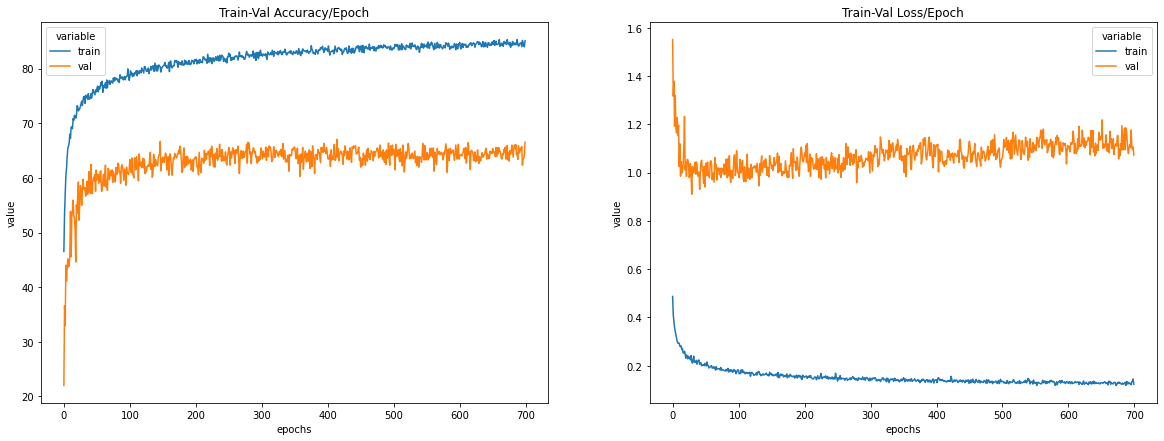

In [37]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [38]:
# Сохраняем модель
torch.save(model, "./content/model.pt")

In [39]:
# Считываем сохраненную модель
model = torch.load("./content/model.pt")

In [40]:
# Выделим вход и выход
X_test = dataset_test.iloc[:, 1:]
y_test = dataset_test.iloc[:, :1]

In [41]:
X_test = scaler.transform(X_test)
X_test, y_test = np.array(X_test), np.array(y_test)

In [42]:
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [43]:
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

## Получение результатов от обученной модели

In [44]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [45]:
df_submission = pd.read_csv("./content/sample_submission.csv")

In [46]:
df_submission["Статус"] = y_pred_list
df_submission["Статус"] = df_submission["Статус"].map(idx2class)
df_submission.head()

,ID,Статус
0,64996,4
1,71837,3
2,86587,3
3,73673,3
4,54709,4


In [47]:
df_submission.to_csv("./content/RSF_submission.csv", index=False)

## Стараемся выбрать правильные признаки

In [77]:
# Выделим вход и выход
X = dataset_train.iloc[:, 1:]
y = dataset_train.iloc[:, :1]

In [78]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [79]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

C:\Users\Сергей\AppData\Local\Temp\ipykernel_2704\1695273052.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [80]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.025 seconds


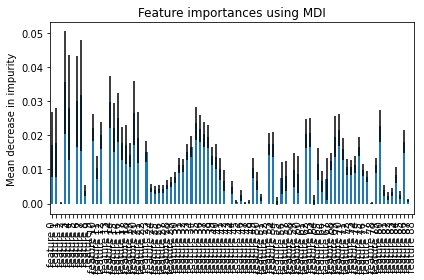

In [144]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [161]:
fi = pd.DataFrame(forest_importances)
fi['Колонка'] = X_train.columns
fi.columns = ['Важность', 'Колонка']
fi = fi.sort_values(by='Важность', ascending=False)
fi.head(50)

,Важность,Колонка
feature 3,0.035520,Основания_БН
feature 7,0.031676,Основания_СН
feature 6,0.029944,Основания_ОО
feature 14,0.029870,Год_Поступления_0.0
feature 4,0.028144,Основания_ДН
feature 20,0.026481,Год_Поступления_2017.0
feature 16,0.025108,Год_Поступления_2013.0
feature 35,0.023506,Год рождения_1994
feature 80,0.022759,КодФакультета_41.0
feature 15,0.022260,Год_Поступления_2012.0


In [147]:
X_train.columns

Index(['Пол_Жен', 'Пол_Муж', 'Пол_nan', 'Основания_БН', 'Основания_ДН',
       'Основания_ЛН', 'Основания_ОО', 'Основания_СН', 'Основания_ЦН',
       'Основания_nan', 'Изучаемый_Язык_Английский язык',
       'Изучаемый_Язык_Другой язык', 'Изучаемый_Язык_Немецкий язык',
       'Изучаемый_Язык_nan', 'Год_Поступления_0.0', 'Год_Поступления_2012.0',
       'Год_Поступления_2013.0', 'Год_Поступления_2014.0',
       'Год_Поступления_2015.0', 'Год_Поступления_2016.0',
       'Год_Поступления_2017.0', 'Год_Поступления_2018.0',
       'Год_Поступления_nan', 'Год рождения_0000', 'Год рождения_1983',
       'Год рождения_1984', 'Год рождения_1985', 'Год рождения_1986',
       'Год рождения_1987', 'Год рождения_1988', 'Год рождения_1989',
       'Год рождения_1990', 'Год рождения_1991', 'Год рождения_1992',
       'Год рождения_1993', 'Год рождения_1994', 'Год рождения_1995',
       'Год рождения_1996', 'Год рождения_1997', 'Год рождения_1998',
       'Год рождения_1999', 'Год рождения_2000', 'Год

In [ ]:
## Еще одно вычисление важности значений

In [85]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 25.902 seconds


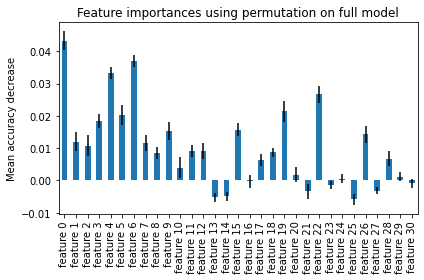

In [86]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [87]:
fi = pd.DataFrame(forest_importances)
fi['Колонка'] = X_train.columns
fi.columns = ['Важность', 'Колонка']
fi = fi.sort_values(by='Важность', ascending=False)
fi.head(60)

,Важность,Колонка
feature 0,0.043375,Основания_БН
feature 6,0.036896,Год_Поступления_2013.0
feature 4,0.033186,Основания_ДН
feature 22,0.026708,Год_Поступления_2014.0
feature 19,0.021437,Год_Поступления_2018.0
feature 5,0.020406,Год_Поступления_2017.0
feature 3,0.018404,Год_Поступления_0.0
feature 15,0.015754,Год рождения_1996
feature 9,0.015430,Год_Поступления_2012.0
feature 26,0.014282,Год_Поступления_2015.0


## Возвращаемся к базовому решению, но на новом уровне

In [101]:
dftr = pd.read_csv("./content/train_dataset_train.csv")
len_train = len(dftr)
print(len_train)
dfte = pd.read_csv("./content/test_dataset_test.csv")
dfte['Статус'] = 0
df_row_concat = pd.concat([dftr, dfte], ignore_index=True, axis=0) 
len(df_row_concat)

13584


20275

In [102]:
df = prepare_dataset(df_row_concat)

In [103]:
# Снова разделим датасеты на обучающий и тестовый
dataset_train = df.iloc[:len_train, :]
dataset_test = df.iloc[len_train:, :]

In [69]:
need_columns = ['Статус', 'Основания_БН', 'Основания_СН', 'Основания_ОО', 'Год_Поступления_0.0', 'Основания_ДН', 
                'Год_Поступления_2017.0', 'Год_Поступления_2013.0', 'Год рождения_1994', 'КодФакультета_41.0', 
                'Год_Поступления_2012.0', 'Изучаемый_Язык_Английский язык', 'Год рождения_1995', 'КодФакультета_26.0',
                'Село_1.0', 'Село_0.0', 'Год рождения_1996', 'Изучаемый_Язык_Немецкий язык', 'Год рождения_1997',
                'КодФакультета_25.0', 'Год_Поступления_2018.0', 'КодФакультета_51.0', 'Пол_Муж', 'Год_Поступления_2014.0',
                'Общежитие_0.0', 'Общежитие_1.0', 'Пол_Жен', 'Год_Поступления_2015.0', 'КодФакультета_34.0',
                'Год рождения_1993', 'КодФакультета_27.0', 'Год рождения_0000', 
                'Год рождения_1992', 'Год_Поступления_2016.0',
                'Год рождения_1998', 'Год рождения_1999', 'КодФакультета_24.0', 'Иностранец_0.0', 'КодФакультета_31.0',
                'Год рождения_1991', 'КодФакультета_40.0', 'Год рождения_1990', 'КодФакультета_28.0', 'КодФакультета_30.0',
                'Изучаемый_Язык_Другой язык', 'Страна_ПП_Россия', 'Год рождения_2000']

dataset_train = dataset_train[need_columns]
dataset_test = dataset_test[need_columns]

In [104]:
need_columns = ['Статус', 'Основания_БН', 'Год_Поступления_2013.0', 'Основания_ДН', 'Год_Поступления_2014.0', 'Год_Поступления_2018.0',
'Год_Поступления_2017.0', 'Год_Поступления_0.0', 'Год рождения_1996', 'Год_Поступления_2012.0', 'Год_Поступления_2015.0', 
'Основания_СН', 'Год рождения_1994', 'Основания_ОО', 'Год рождения_1995', 'КодФакультета_26.0', 'КодФакультета_25.0',
'КодФакультета_41.0', 'Год рождения_1993', 'Год рождения_1997', 'Изучаемый_Язык_Английский язык', 'КодФакультета_51.0',
'КодФакультета_27.0', 'Общежитие_1.0']

dataset_train = dataset_train[need_columns]
dataset_test = dataset_test[need_columns]

In [105]:
# Выделим вход и выход
X = dataset_train.iloc[:, 1:]
y = dataset_train.iloc[:, :1]

In [106]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

### Обучение модели

In [107]:
clf = RandomForestClassifier(random_state=0)

In [108]:
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=0)

### Оценка точности

In [109]:
pred = clf.predict(X_val)

In [110]:
y_val.head(3)

,Статус
1061,1
6482,1
10622,2


In [111]:
f1_score(y_val, pred, average='macro', zero_division = 0)

0.49841532431662